<a href="https://colab.research.google.com/github/adalves-ufabc/2022.Q2-PLN/blob/main/2022_Q2_PLN_Notebook_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2021.Q3]**
Prof. Alexandre Donizeti Alves

# **Métodos de Extração de *Features***

---

## **Introdução**

Para usar um algoritmo de Aprendizado de Máquina em dados textuais, precisamos de uma representação numérica ou vetorial de dados de texto, uma vez que a maioria desses algoritmos são incapazes de trabalhar diretamente com texto simples ou strings. 

Mas antes de converter os dados de texto em formato numérico, precisaremos passá-los por algumas etapas de pré-processamento, como tokenização, *stemming*, lematização e remoção de *stopwords*.

## **Tipos de dados**

Para lidar com os dados de maneira eficaz, precisamos entender as várias formas em que eles existem. Primeiro, vamos explorar os tipos de dados que existem. Existem duas maneiras principais de categorizar os dados (por estrutura e por conteúdo).

**Categorizando dados com base na estrutura**

Os dados podem ser divididos com base na estrutura em três categorias, a saber, dados estruturados, semiestruturados e não estruturados, conforme mostrado no diagrama a seguir:

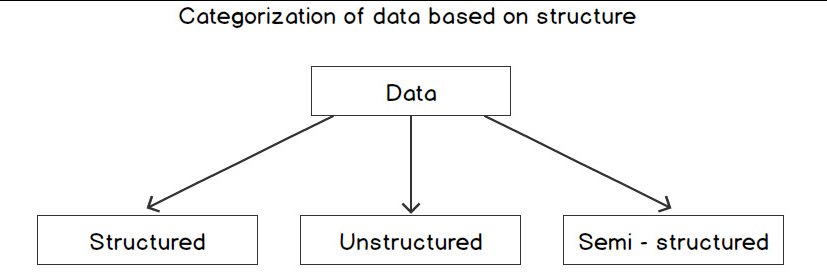

Essas três categorias são as seguintes:

**Dados estruturados**: esta é a forma mais organizada de dados. É representado em formatos tabulares, como arquivos Excel e arquivos *Comma-Separated Value* (CSV). A imagem a seguir mostra a aparência geral dos dados estruturados:

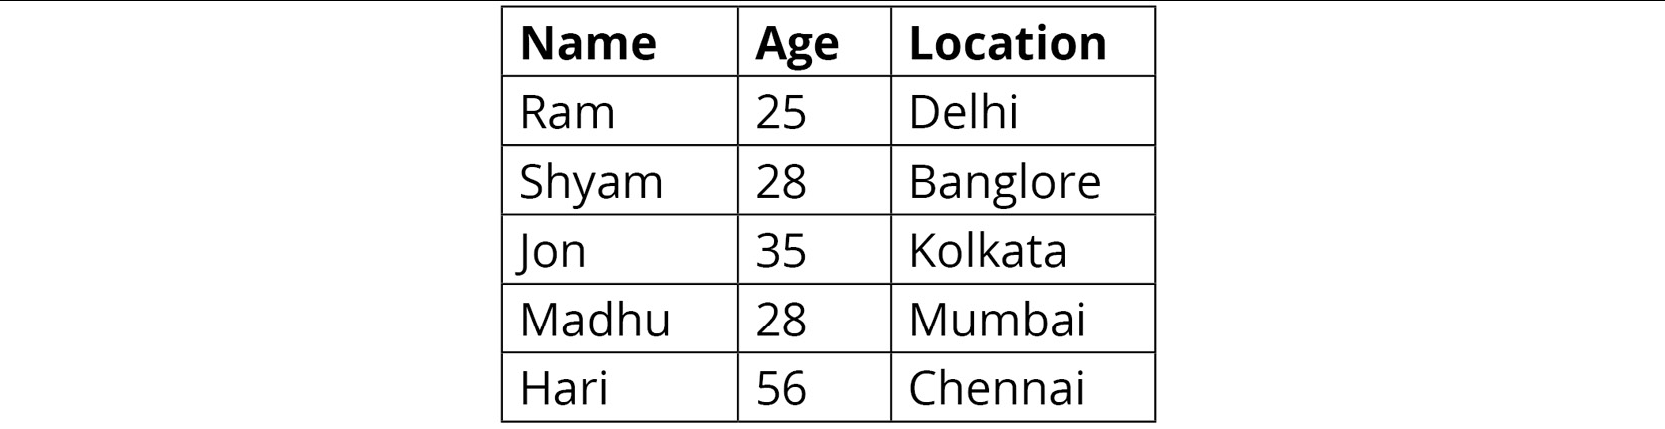

**Dados semiestruturados**: este tipo de dados não é apresentado em uma estrutura tabular, mas pode ser transformado em uma tabela. Aqui, as informações geralmente são armazenadas entre as tags seguindo um padrão definido. Os arquivos XML e HTML podem ser chamados de dados semiestruturados. A captura de tela a seguir mostra como os dados semiestruturados podem aparecer:

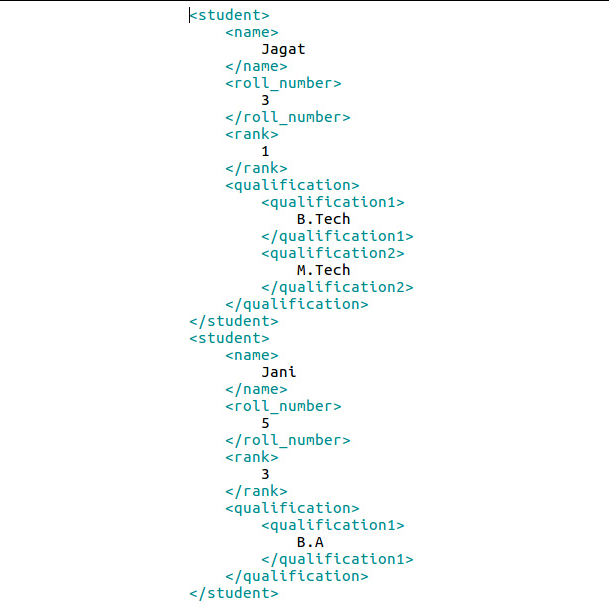

**Dados não estruturados**: este tipo de dados é o mais difícil de lidar. Os algoritmos de aprendizado de máquina teriam dificuldade em compreender dados não estruturados sem qualquer perda de informações. Corpora de texto e imagens são exemplos de dados não estruturados. A imagem a seguir mostra a aparência dos dados não estruturados:

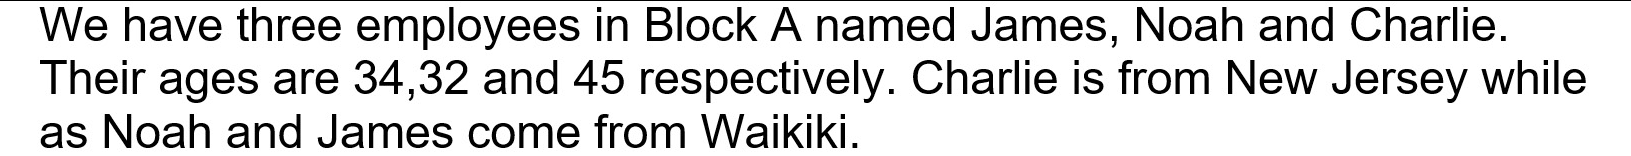

**Categorizando dados com base no conteúdo**

Os dados podem ser divididos em quatro categorias com base no conteúdo, conforme mostrado no diagrama a seguir:

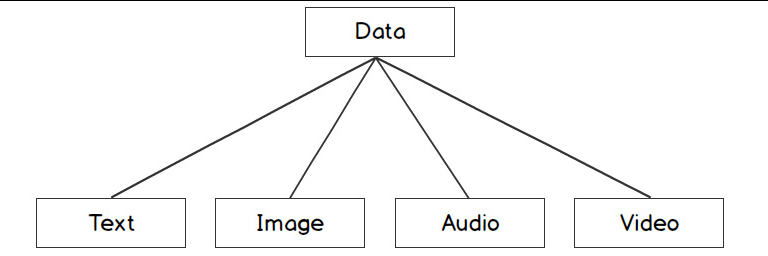

## **Limpeza de Dados de Texto**

Os dados de texto que vamos discutir aqui são **dados de texto não estruturados**, que consistem de sentenças escritas. 

Na maioria das vezes, esses dados de texto não podem ser usados da maneira que estão para análise porque contêm alguns elementos ruidosos, ou seja, elementos que realmente não contribuem muito para o significado da frase.

Esses elementos ruidosos precisam ser removidos porque não contribuem para o significado e a semântica do texto. Se não forem removidos, eles podem não apenas desperdiçar a memória do sistema e o tempo de processamento, mas também afetar negativamente a precisão dos resultados. A **limpeza de dados** é a arte de extrair partes significativas dos dados eliminando detalhes desnecessários.

### **01 - Limpeza de Texto e Tokenização**

Neste exemplo, para realizar tarefas de PLN na frase, precisaremos remover os emojis, pontuação e *stopwords* e, em seguida, alterar as palavras em sua forma gramatical básica.

In [4]:
import re

def clean_text(sentence):
    return re.sub(r'([^\s\w]|_)+', ' ', sentence).split()

sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
            New Delhi. Mesmerizing performance by Indian Army! Awesome airshow! @india_official \
            @indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'

clean_text(sentence)

['Sunil',
 'tweeted',
 'Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 'New',
 'Delhi',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 'Awesome',
 'airshow',
 'india',
 'official',
 'indian',
 'army',
 'India',
 '70thRepublic',
 'Day',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 'photoking',
 'com']

### **02 - Extração de n-gramas**

Neste exemplo, extrairemos n-gramas usando três métodos diferentes. Primeiro, usaremos funções personalizadas e, em seguida, as bibliotecas **nltk** e **textblob**.

In [5]:
import re

def n_gram_extractor(sentence, n):
    tokens = re.sub(r'([^\s\w]|_)+', ' ', sentence).split()
    for i in range(len(tokens)-n+1):
        print(tokens[i:i+n])

In [6]:
n_gram_extractor('O menino bonitinho está brincando com o gatinho.', 2)

['O', 'menino']
['menino', 'bonitinho']
['bonitinho', 'está']
['está', 'brincando']
['brincando', 'com']
['com', 'o']
['o', 'gatinho']


In [7]:
n_gram_extractor('O menino bonitinho está brincando com o gatinho.', 3)

['O', 'menino', 'bonitinho']
['menino', 'bonitinho', 'está']
['bonitinho', 'está', 'brincando']
['está', 'brincando', 'com']
['brincando', 'com', 'o']
['com', 'o', 'gatinho']


In [8]:
from nltk import ngrams
list(ngrams('O menino bonitinho está brincando com o gatinho.'.split(), 2))

[('O', 'menino'),
 ('menino', 'bonitinho'),
 ('bonitinho', 'está'),
 ('está', 'brincando'),
 ('brincando', 'com'),
 ('com', 'o'),
 ('o', 'gatinho.')]

In [9]:
list(ngrams('O menino bonitinho está brincando com o gatinho.'.split(), 3))

[('O', 'menino', 'bonitinho'),
 ('menino', 'bonitinho', 'está'),
 ('bonitinho', 'está', 'brincando'),
 ('está', 'brincando', 'com'),
 ('brincando', 'com', 'o'),
 ('com', 'o', 'gatinho.')]

In [10]:
!pip install -U textblob

import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.3 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from textblob import TextBlob
blob = TextBlob("O menino bonitinho está brincando com o gatinho.")
blob.ngrams(n=2)

[WordList(['O', 'menino']),
 WordList(['menino', 'bonitinho']),
 WordList(['bonitinho', 'está']),
 WordList(['está', 'brincando']),
 WordList(['brincando', 'com']),
 WordList(['com', 'o']),
 WordList(['o', 'gatinho'])]

In [15]:
blob.ngrams(n=3)

[WordList(['O', 'menino', 'bonitinho']),
 WordList(['menino', 'bonitinho', 'está']),
 WordList(['bonitinho', 'está', 'brincando']),
 WordList(['está', 'brincando', 'com']),
 WordList(['brincando', 'com', 'o']),
 WordList(['com', 'o', 'gatinho'])]

### **03 - Tokenização com Keras e TextBlob**

In [16]:
from keras.preprocessing.text import text_to_word_sequence
from textblob import TextBlob

sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
New Delhi. Mesmerizing performancesby Indian Army! Awesome airshow! @india_official \
@indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'

sentence

'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, New Delhi. Mesmerizing performancesby Indian Army! Awesome airshow! @india_official @indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'

In [17]:
def get_keras_tokens(text):
    return text_to_word_sequence(text)

get_keras_tokens(sentence)

['sunil',
 'tweeted',
 'witnessing',
 '70th',
 'republic',
 'day',
 'of',
 'india',
 'from',
 'rajpath',
 'new',
 'delhi',
 'mesmerizing',
 'performancesby',
 'indian',
 'army',
 'awesome',
 'airshow',
 'india',
 'official',
 'indian',
 'army',
 'india',
 '70threpublic',
 'day',
 'for',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 'photoking',
 'com']

In [18]:
def get_textblob_tokens(text):
    blob = TextBlob(text)
    return blob.words

get_textblob_tokens(sentence)

WordList(['Sunil', 'tweeted', 'Witnessing', '70th', 'Republic', 'Day', 'of', 'India', 'from', 'Rajpath', 'New', 'Delhi', 'Mesmerizing', 'performancesby', 'Indian', 'Army', 'Awesome', 'airshow', 'india_official', 'indian_army', 'India', '70thRepublic_Day', 'For', 'more', 'photos', 'ping', 'me', 'sunil', 'photoking.com'])

### **04 - Tokenização usando vários tokenizadores**

**Tipos de Tokenizadores**

>
Existem diferentes tipos de tokenizadores que são úteis para tarefas específicas. Vejamos os fornecidos pela biblioteca **nltk**:

>***Whitespace tokenizer*** (Tokenizador de espaço em branco): este é o tipo mais simples de tokenizador. Ele divide uma string sempre que um caractere de espaço, tabulação ou nova linha estiver presente.
>
>***Tweet tokenizer*** (Tokenizador de tweets): projetado especificamente para tokenizar tweets. Ele cuida de todos os caracteres especiais e emojis usados em tweets e retorna tokens limpos.
>
>***MWE tokenizer*** (Tokenizador MWE): MWE significa *Multi-Word Expression*. Aqui, certos grupos de palavras são tratados como uma entidade durante a tokenização, como "*United States of America*", "*People's Republic of China*", "*not only*" e "*but also*". Esses grupos predefinidos são adicionados no início com métodos `mwe()`.
>
>***Regular expression tokenizer*** (Tokenizador de expressão regular): esses tokenizadores são desenvolvidos usando expressões regulares. As frases são divididas com base na ocorrência de um padrão específico (uma expressão regular).
>
>***WordPunctTokenizer***: divide um trecho de texto em uma lista de caracteres alfabéticos e não alfabéticos. Na verdade, ele divide o texto em tokens usando um regex, ou seja, **`'\w+|[^\w\s]+'`**.

In [19]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import WordPunctTokenizer

sentence = 'Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
New Delhi. Mesmerizing performance by Indian Army! Awesome airshow! @india_official \
@indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"'

In [20]:
def tokenize_with_tweet_tokenizer(text):
    tweet_tokenizer = TweetTokenizer() 
    return tweet_tokenizer.tokenize(text)
    
tokenize_with_tweet_tokenizer(sentence)

['Sunil',
 'tweeted',
 ',',
 '"',
 'Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 ',',
 'New',
 'Delhi',
 '.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 '!',
 'Awesome',
 'airshow',
 '!',
 '@india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day',
 '.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoking.com',
 ':)',
 '"']

In [21]:
def tokenize_with_mwe(text):
    mwe_tokenizer = MWETokenizer([('Republic', 'Day')])
    mwe_tokenizer.add_mwe(('Indian', 'Army'))
    return mwe_tokenizer.tokenize(text.split())

tokenize_with_mwe(sentence)

['Sunil',
 'tweeted,',
 '"Witnessing',
 '70th',
 'Republic_Day',
 'of',
 'India',
 'from',
 'Rajpath,',
 'New',
 'Delhi.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army!',
 'Awesome',
 'airshow!',
 '@india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoking.com',
 ':)"']

No exemplo anterior, as palavras "*Indian*" e "*Army*!", que deveriam ser tratadas como uma única identidade, foram tratadas separadamente. Isso ocorre porque "*Army*!" (não "*Army*") é tratado como um token. Vamos ver como isso pode ser corrigido no próximo exemplo.

In [22]:
tokenize_with_mwe(sentence.replace('!',''))

['Sunil',
 'tweeted,',
 '"Witnessing',
 '70th',
 'Republic_Day',
 'of',
 'India',
 'from',
 'Rajpath,',
 'New',
 'Delhi.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian_Army',
 'Awesome',
 'airshow',
 '@india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoking.com',
 ':)"']

Aqui, podemos ver que, em vez de serem tratados como tokens separados, "*Indian*" e "*Army*" são tratados como uma única entidade.

In [23]:
def tokenize_with_regex_tokenizer(text):
    reg_tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    return reg_tokenizer.tokenize(text)

tokenize_with_regex_tokenizer(sentence)

['Sunil',
 'tweeted',
 ',',
 '"Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 ',',
 'New',
 'Delhi',
 '.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 '!',
 'Awesome',
 'airshow',
 '!',
 '@india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 '@photoking.com',
 ':)"']

In [24]:
def tokenize_with_wst(text):
    wh_tokenizer = WhitespaceTokenizer()
    return wh_tokenizer.tokenize(text)

tokenize_with_wst(sentence)

['Sunil',
 'tweeted,',
 '"Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath,',
 'New',
 'Delhi.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army!',
 'Awesome',
 'airshow!',
 '@india_official',
 '@indian_army',
 '#India',
 '#70thRepublic_Day.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil@photoking.com',
 ':)"']

In [25]:
def tokenize_with_wordpunct_tokenizer(text):
    wp_tokenizer = WordPunctTokenizer()
    return wp_tokenizer.tokenize(text)

tokenize_with_wordpunct_tokenizer(sentence)

['Sunil',
 'tweeted',
 ',',
 '"',
 'Witnessing',
 '70th',
 'Republic',
 'Day',
 'of',
 'India',
 'from',
 'Rajpath',
 ',',
 'New',
 'Delhi',
 '.',
 'Mesmerizing',
 'performance',
 'by',
 'Indian',
 'Army',
 '!',
 'Awesome',
 'airshow',
 '!',
 '@',
 'india_official',
 '@',
 'indian_army',
 '#',
 'India',
 '#',
 '70thRepublic_Day',
 '.',
 'For',
 'more',
 'photos',
 'ping',
 'me',
 'sunil',
 '@',
 'photoking',
 '.',
 'com',
 ':)"']

### **05 - Convertendo palavras no tempo presente contínuo em palavras básicas com `RegexStemmer`**

Neste exemplo, usaremos `RegexpStemmer` no texto para converter palavras em sua forma básica, removendo alguns sufixos genéricos, como "***ing***" e "***ed***".

In [26]:
from nltk.stem import RegexpStemmer

def get_stems(text):
    regex_stemmer = RegexpStemmer('ing$', min=4) # creating an object of RegexpStemmer, 
                                             # any string ending with the given
                                             # regex ‘ing$’ will be removed.
    # The below code line will convert every word into its stem using regex stemmer 
    # and then join them with space.
    return ' '.join([regex_stemmer.stem(wd) for wd in text.split()])

 
sentence = "I love playing football"
get_stems(sentence)

'I love play football'

### **06 - Usando `Porter Stemmer`**

***Porter Stemmer*** é o *stemmer* mais comum para lidar com palavras em inglês. 

Ele remove várias terminações morfológicas e flexionais (como sufixos, prefixos e o plural "s") das palavras em inglês. Ao fazer isso, ele nos ajuda a extrair a forma básica de uma palavra de suas variações. 

In [28]:
from nltk.stem.porter import *

sentence = "Before eating, it would be nice to sanitize your hands with a sanitizer"

def get_stems(text):
    ps_stemmer = PorterStemmer()
    return ' '.join([ps_stemmer.stem(wd) for wd in text.split()])
 
get_stems(sentence)

'befor eating, it would be nice to sanit your hand with a sanit'

### **07 - Lematização**

In [31]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [32]:
lemmatizer = WordNetLemmatizer()
def get_lemmas(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])


sentence = "The products produced by the process today are far better than what it produces generally."

get_lemmas(sentence)

'The product produced by the process today are far better than what it produce generally .'

### **08 - Palavras no singular e no plural** 

In [33]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from textblob import TextBlob

sentence = TextBlob('She sells seashells on the seashore')

sentence.words

WordList(['She', 'sells', 'seashells', 'on', 'the', 'seashore'])

In [35]:
def singularize(word):
    return word.singularize()

singularize(sentence.words[2])

'seashell'

In [36]:
def pluralize(word):
    return word.pluralize()

pluralize(sentence.words[5])

'seashores'

### **09 - Tradução Automática**

Você pode ter usado o Google Translate antes, que fornece a tradução exata de uma palavra em outro idioma; este é um exemplo de tradução de idioma ou tradução automática. 
>
Em Python, podemos usar **`TextBlob`** para traduzir texto de um idioma para outro. **`TextBlob`** fornece um método chamado `translate()`, no qual você deve passar o texto no idioma de origem. O método retornará a palavra traduzida no idioma de destino.

In [40]:
from textblob import TextBlob

def translate(text, from_l, to_l):
    en_blob = TextBlob(text)
    return en_blob.translate(from_lang=from_l, to=to_l)

translate(text='muy bien', from_l='es', to_l='en')

TextBlob("very good")

### **10 - Removendo *stopwords***

In [41]:
from nltk import word_tokenize

def remove_stop_words(text,stop_word_list):
    return ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_word_list])

sentence = "She sells seashells on the seashore"
custom_stop_word_list = ['she', 'on', 'the', 'am', 'is', 'not']

remove_stop_words(sentence, custom_stop_word_list)

'sells seashells seashore'

### **Atividade - Extraindo as principais palavras-chave de um artigo de notícias**

Nesta atividade, você extrairá as palavras-chave que ocorrem com mais frequência de um exemplo de artigo de notícias.

In [42]:
# import nltk and any other necessary libraries
import operator

from nltk.tokenize import WhitespaceTokenizer
from nltk import download, stem

download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
# define some functions to help you load the text file, 
# convert the string into lowercase, tokenize the text, 
# remove the stop words, and perform stemming on all the 
# remaining tokens. Finally, define a function to calculate 
# the frequency of all these words

def load_file(file_path):
    news = ''.join([line for line in open(file_path,encoding='utf-8')])
    return news

# this method will take string as input and return the string
#  converted into lowercase
def to_lower_case(text):
    return text.lower()

# this will take a text string as input and return the token
wht = WhitespaceTokenizer()
def tokenize_text(text):
    return wht.tokenize(text=text)

# this will remove stop word tokens from the token list
stop_words = stopwords.words('english')
def remove_stop_words(token_list):
    return [word for word in token_list if word not in stop_words]

# this will take a token list as input and return stemmed token list
stemmer = stem.PorterStemmer()
def get_stems(token_list):
    return [stemmer.stem(word) for word in token_list]

# this method will generate a dict of word frequencies from list.
def get_freq(stems):
    freq_dict = {}
    for t in stems:
        freq_dict[t.strip()] = freq_dict.get(t.strip(), 0) + 1
    
    return freq_dict

# this method will sort the dictionary on the values and return the top n 
# keys of the dictionary.
def get_top_n_words(freq_dict, n):
    sorted_dict = sorted(freq_dict.items(), key=operator.itemgetter(1), reverse=True)
    
    return [x for x in sorted_dict][:n]
    #return [x[0] for x in sorted_dict][:n]

In [44]:
# load news_article.txt using a Python file reader into a single string
news_article = load_file("/content/news_article.txt")
news_article

'Ever since the populist Law and Justice (pis) party took power in 2015, Adam Bodnar, Poland’s\n human-rights ombudsman, has been warning against its relentless efforts to get control of the\n courts. To illustrate the danger, he uses an expression from communist times: lex telefonica.\n In the Polish People’s Republic, verdicts were routinely dictated by a phone call from an\n apparatchik at party headquarters. Today’s government has more subtle techniques,\n but the goal is the same, Mr Bodnar says: “If a judge has a case on his desk with some\n political importance, he should be afraid.”\n\nThe European Commission is worried, too. It accuses pis of violating Poland’s commitments\nto the rule of law under the European Union’s founding treaty. In 2017 the commission took\nPoland to the European Court of Justice (ecj) over laws that gave politicians control over\nappointing judges. (For example, they lowered judges’ retirement age while letting the justice\n minister pick whom to exemp

In [45]:
# convert the text string into lowercase.
lower_case_news_art = to_lower_case(text=news_article)
lower_case_news_art

'ever since the populist law and justice (pis) party took power in 2015, adam bodnar, poland’s\n human-rights ombudsman, has been warning against its relentless efforts to get control of the\n courts. to illustrate the danger, he uses an expression from communist times: lex telefonica.\n in the polish people’s republic, verdicts were routinely dictated by a phone call from an\n apparatchik at party headquarters. today’s government has more subtle techniques,\n but the goal is the same, mr bodnar says: “if a judge has a case on his desk with some\n political importance, he should be afraid.”\n\nthe european commission is worried, too. it accuses pis of violating poland’s commitments\nto the rule of law under the european union’s founding treaty. in 2017 the commission took\npoland to the european court of justice (ecj) over laws that gave politicians control over\nappointing judges. (for example, they lowered judges’ retirement age while letting the justice\n minister pick whom to exemp

In [46]:
# split the string into tokens using a white space tokenizer
tokens = tokenize_text(lower_case_news_art)

In [47]:
# remove any stop words
removed_tokens = remove_stop_words(tokens)

In [48]:
# perform stemming on all the tokens
stems = get_stems(removed_tokens)

In [49]:
# calculate the frequency of all the words after stemming
freq_dict = get_freq(stems)

In [50]:
top_keywords = get_top_n_words(freq_dict, 10)
top_keywords

[('law', 3),
 ('justic', 3),
 ('european', 3),
 ('parti', 2),
 ('took', 2),
 ('poland’', 2),
 ('control', 2),
 ('commiss', 2),
 ('rule', 2),
 ('ever', 1)]

**Referência**:

Capítulo 2: *Feature Extraction Methods*

https://www.packtpub.com/product/the-natural-language-processing-workshop-second-edition/9781800208421


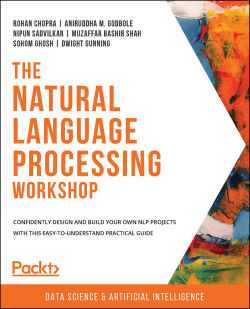

